<a href="https://colab.research.google.com/github/Aakame/HoudaB.github.io/blob/main/P%26C_testing_reps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the full dataset
df = pd.read_csv('P&C removed accounts - achiev all.csv')

# Data cleaning
df['month'] = pd.to_datetime(df['month'], format='%Y_%m')
df['Payout'] = df['Payout'].replace({'€':'', ',':''}, regex=True).astype(float)
for col in ['Total%', '1st Component %', '2nd Component %', 'Accelaerator%']:
    df[col] = df[col].replace({'%':''}, regex=True).astype(float)


In [2]:
test_group = [
    'ilies.boudia@auto1.com',
    'soleya.ramanitriarivo@auto1.com',
    'amar.farhi@auto1.com',
    'keryl.koudjo@auto1.com',
    'melvin.djomeni@auto1.com',
    'mouhamnadou.drame@auto1.com',
    'sebastien.goueffon@auto1.com',
    'spetit@auto1.com'
]

df['group'] = np.where(df['srep'].isin(test_group), 'Test', 'Control')


/tmp/ipython-input-3-564236618.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y=metric, hue='group', marker='o', ci=None)


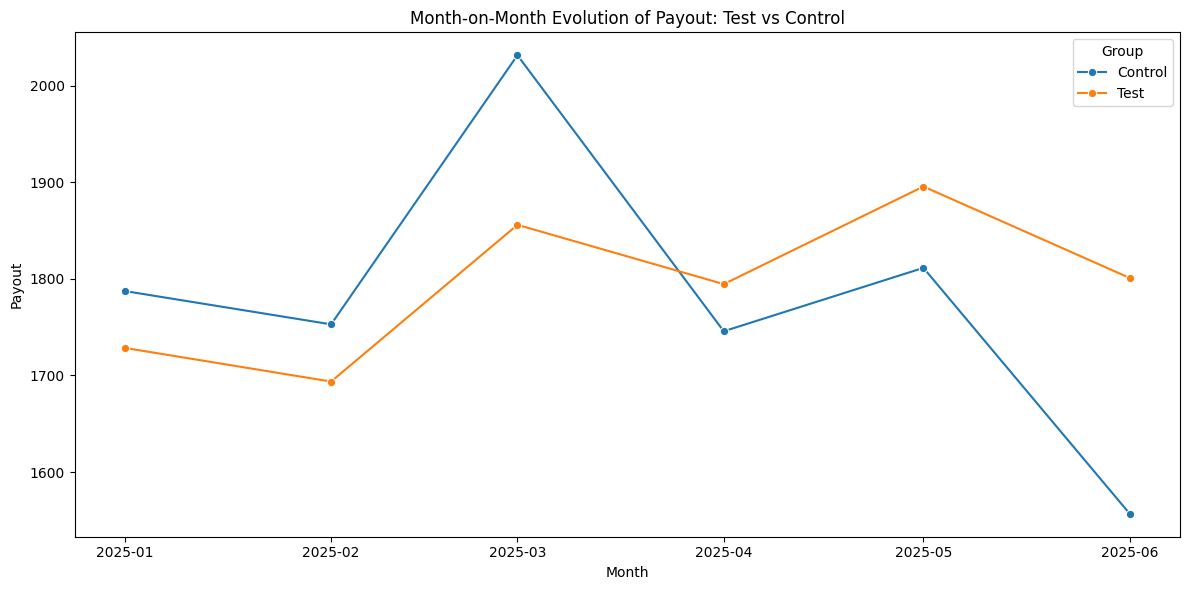

/tmp/ipython-input-3-564236618.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y=metric, hue='group', marker='o', ci=None)


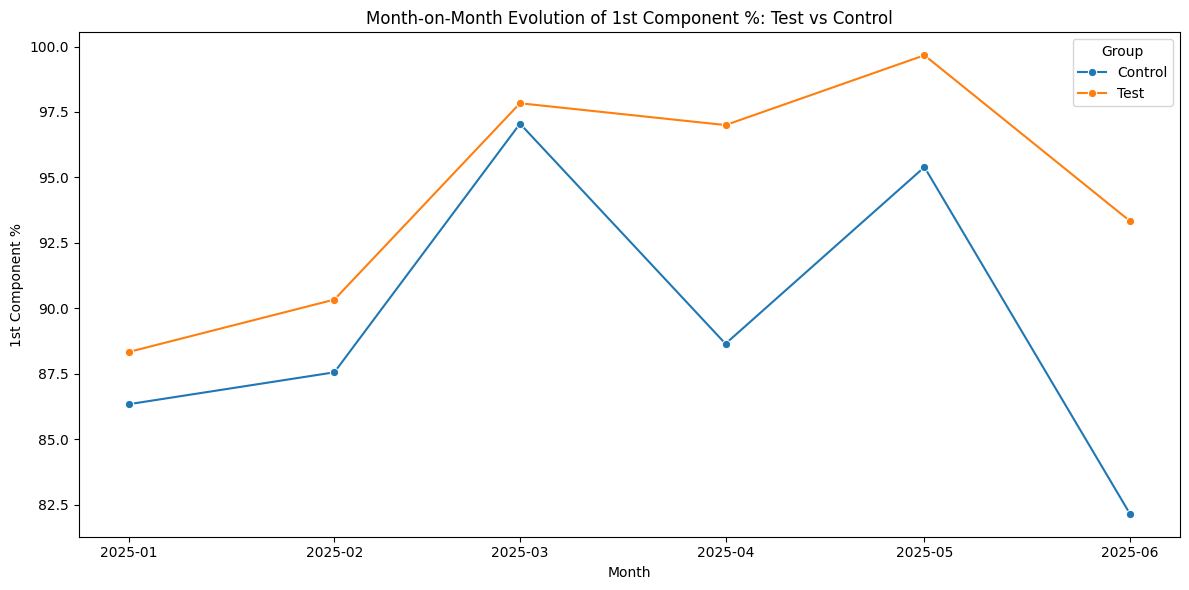

In [3]:
metrics = ['Payout', '1st Component %']

for metric in metrics:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='month', y=metric, hue='group', marker='o', ci=None)
    plt.title(f'Month-on-Month Evolution of {metric}: Test vs Control')
    plt.ylabel(metric)
    plt.xlabel('Month')
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()


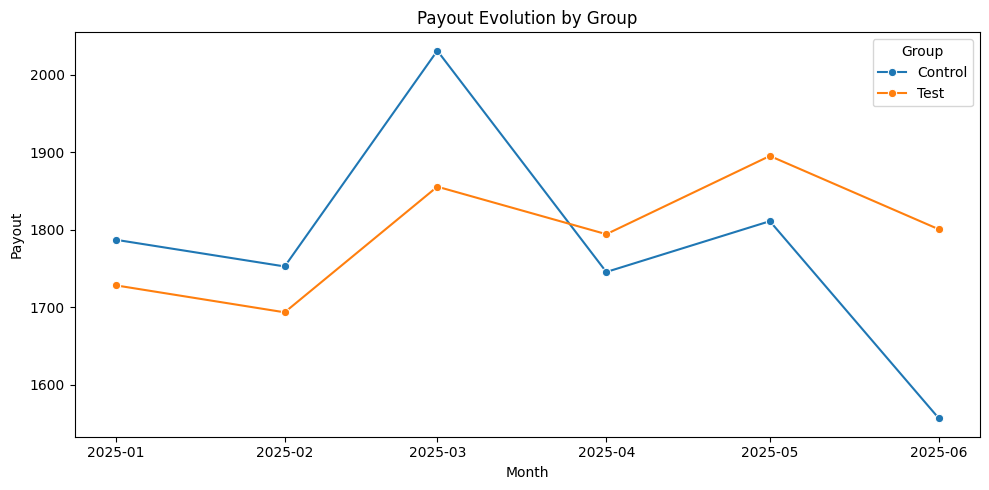

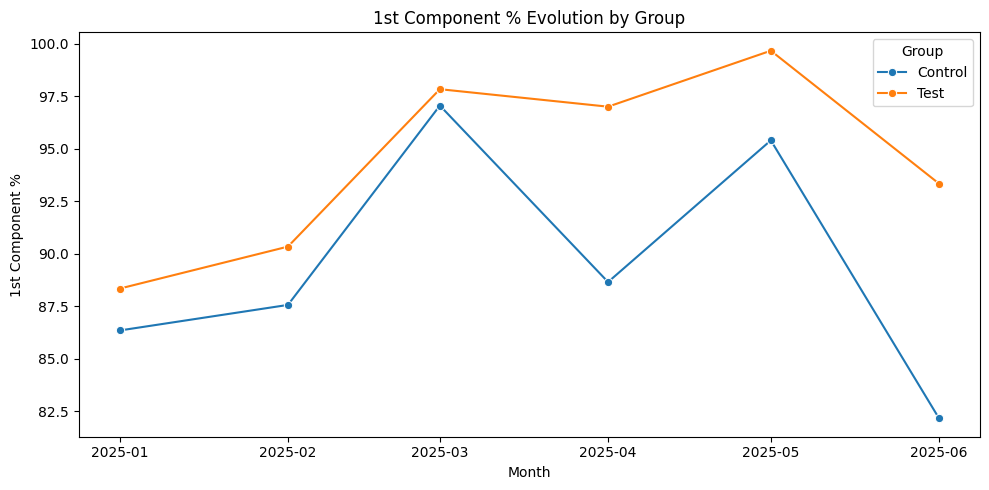

In [4]:
grouped = df.groupby(['month', 'group'])[metrics].mean().reset_index()

for metric in metrics:
    plt.figure(figsize=(10,5))
    sns.lineplot(data=grouped, x='month', y=metric, hue='group', marker='o')
    plt.title(f'{metric} Evolution by Group')
    plt.ylabel(metric)
    plt.xlabel('Month')
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()


In [5]:
# seniority_group = df.groupby(['month', 'seniority', 'group'])[metrics].mean().reset_index()

# for metric in metrics:
#     plt.figure(figsize=(12,6))
#     sns.lineplot(
#         data=seniority_group,
#         x='month', y=metric, hue='group', style='seniority', markers=True, dashes=False
#     )
#     plt.title(f'{metric} Evolution by Seniority and Group')
#     plt.ylabel(metric)
#     plt.xlabel('Month')
#     plt.legend(title='Group/Seniority')
#     plt.tight_layout()
#     plt.show()


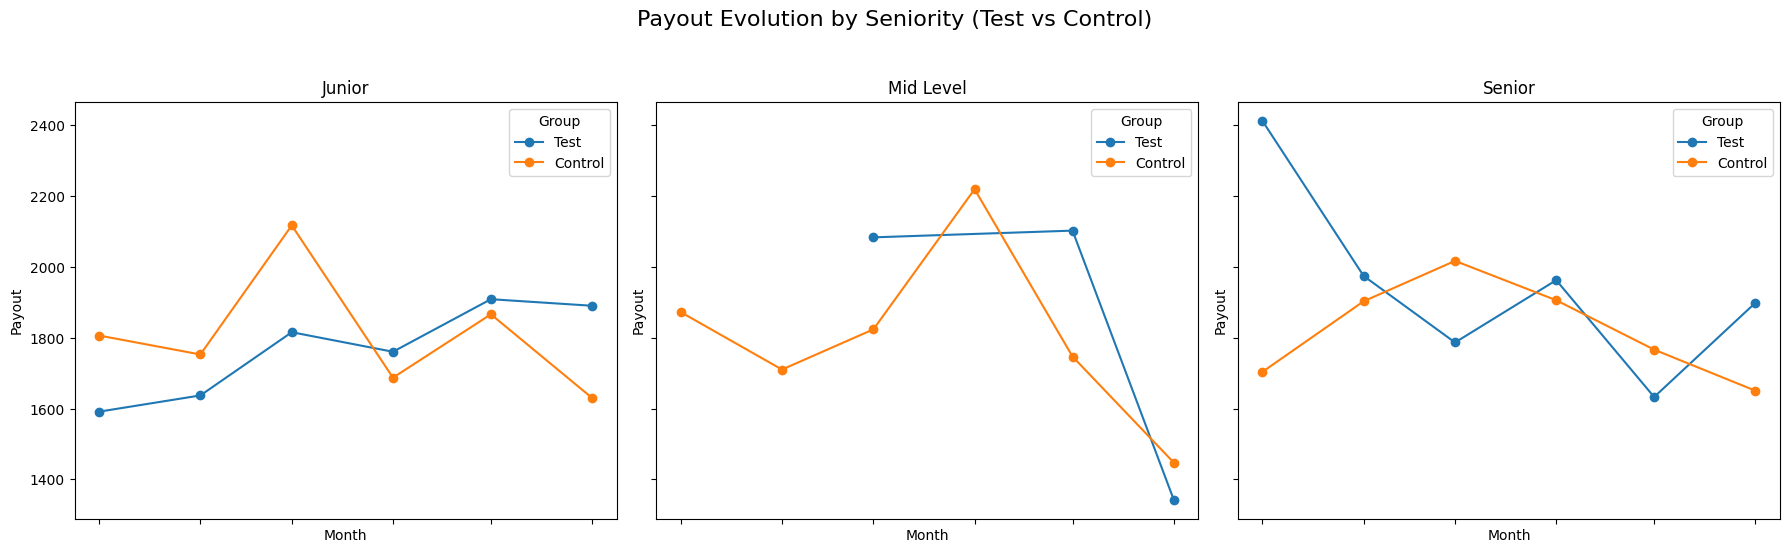

In [6]:
metric = 'Payout'  # or '1st Component %'
seniorities = df['seniority'].dropna().unique()

color_map = {'Control': '#ff7f0e', 'Test': '#1f77b4'}

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, seniority in enumerate(seniorities):
    ax = axes[i]
    data = df[df['seniority'] == seniority]
    grouped = data.groupby(['month', 'group'])[metric].mean().reset_index()
    for group in ['Test', 'Control']:
        group_data = grouped[grouped['group'] == group]
        ax.plot(
            group_data['month'],
            group_data[metric],
            marker='o',
            label=group,
            color=color_map[group]
        )
    ax.set_title(f"{seniority}")
    ax.set_xlabel("Month")
    ax.set_ylabel(metric)
    ax.legend(title='Group')

# Hide unused subplots if less than 6 seniority levels
for j in range(len(seniorities), 6):
    fig.delaxes(axes[j])

fig.suptitle(f"{metric} Evolution by Seniority (Test vs Control)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


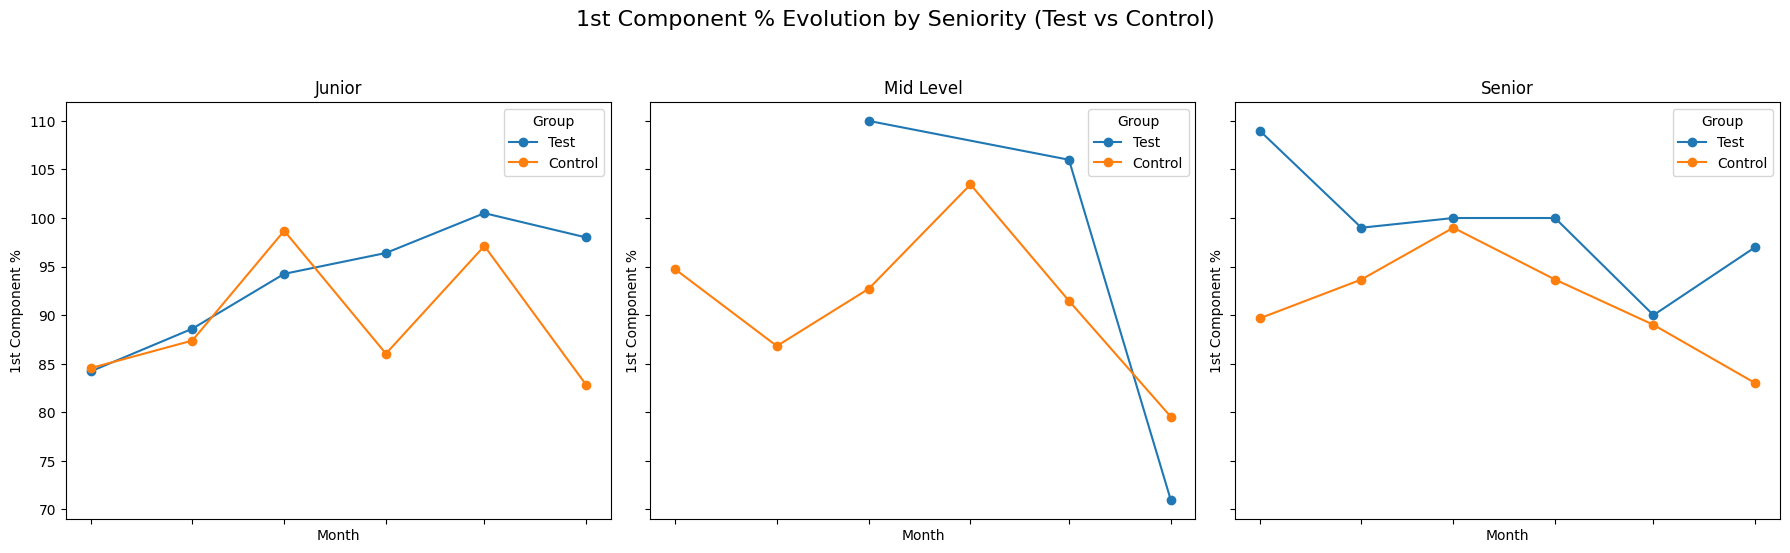

In [7]:
metric = '1st Component %'  # or '1st Component %'
seniorities = df['seniority'].dropna().unique()

color_map = {'Control': '#ff7f0e', 'Test': '#1f77b4'}

fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, seniority in enumerate(seniorities):
    ax = axes[i]
    data = df[df['seniority'] == seniority]
    grouped = data.groupby(['month', 'group'])[metric].mean().reset_index()
    for group in ['Test', 'Control']:
        group_data = grouped[grouped['group'] == group]
        ax.plot(
            group_data['month'],
            group_data[metric],
            marker='o',
            label=group,
            color=color_map[group]
        )
    ax.set_title(f"{seniority}")
    ax.set_xlabel("Month")
    ax.set_ylabel(metric)
    ax.legend(title='Group')

# Hide unused subplots if less than 6 seniority levels
for j in range(len(seniorities), 6):
    fig.delaxes(axes[j])

fig.suptitle(f"{metric} Evolution by Seniority (Test vs Control)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
